In [106]:
#Programming_project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

<h3><b>Data Acquisition</b></h3>

In [107]:
# Data acquisition
NY_dataset = pd.read_csv("C:\\Users\\alesi\\Desktop\\Programming\\Programming_project\\AB_NYC_2019.csv")

# First 5 rows of the DataFrame
NY_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [108]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 16


In [109]:
pd.set_option('display.float_format', '{:.3f}'.format)
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,38843.000,1.373,1.680,0.010,0.190,0.720,2.020,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


In [110]:
NY_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that the DataFrame has 48'895 rows and 16 columns.

<h3><b>Data Cleaning</b></h3>

In [111]:
# Checking the presence of missing values
NY_dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that there are 4 columns with missing values, but columns "name" and "host_name" and "last_review" are irrelevant to our data analysis and column "review_per_month" needs very simple handling.

We delete "name", "host_name" and "last_review" because are irrelevant in our analysis.

In [112]:
NY_dataset.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)


The 'reviews_per_month' column gives information about the number of reviews per month. Since a missing value means the item has no reviews for all time, it has 0 reviews per month.

In [113]:
NY_dataset.fillna({'reviews_per_month': 0}, inplace=True)

In [114]:
# Checking if we have deleted all the missing data
NY_dataset.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [115]:
NY_dataset.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,2595,2845,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,3647,4632,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,0.000,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,5022,7192,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0


In [116]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 13


<h4><b>Outliers</b></h4>

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'latitude'}>],
       [<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'center': 'availability_365'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

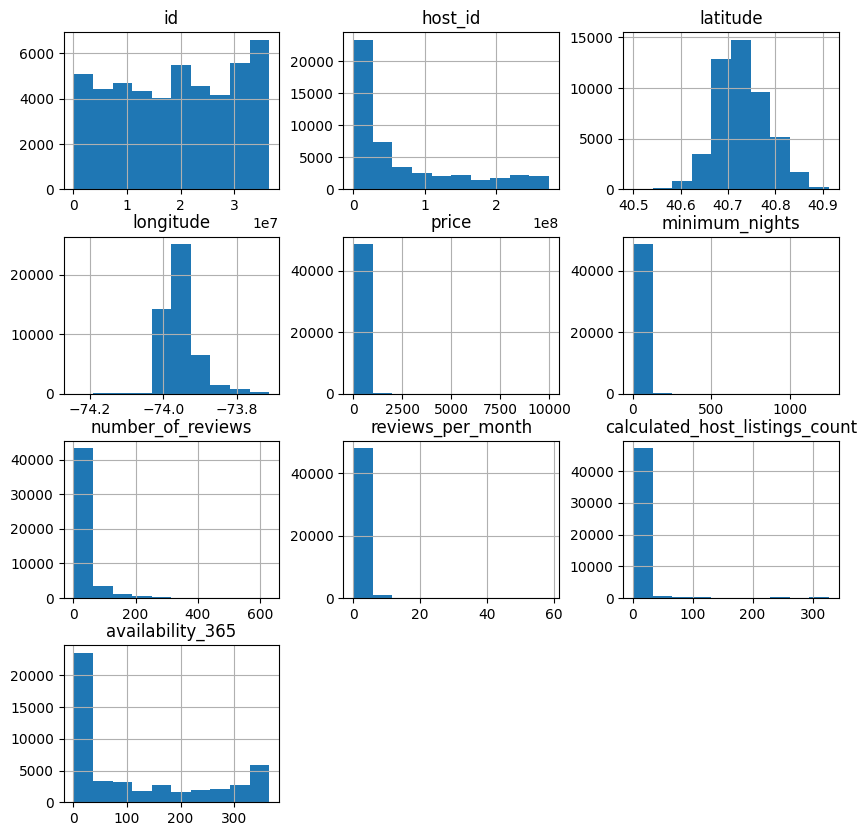

In [117]:
NY_dataset.hist(figsize=(10,10))

In [118]:
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,48895.000,1.091,1.597,0.000,0.040,0.370,1.580,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


Looking at this table and the histograms above, we can see that there are data points that are significantly different from other points in the dataset.
Here are some observations:
- 'price': The dataset shows an unusual distribution in terms of price values. On one end, there are instances with a minimum price of 0, which is unexpected. On the other end, some listings have prices as high as 10'000 those are significantly above the 75th percentile. This wide price range contributes to a notable standard deviation.

- 'minimum_nights': An interesting observation is the presence of high values for the 'minimum_nights' column. There is a maximum of 1'250 nights that is significantly above the 75th percentile.

- 'number_of_reviews': While most listings seem to have a moderate number of reviews, there are a few with exceptionally high counts, reaching as high as 629 reviews. This number is significantly above the 75th percentile, indicating the existence of potential outliers.

- 'reviews_per_month': There are instances where the value reaches as high as 58.5 reviews per month. This is significantly above the 75th percentile, suggesting the likelihood of outliers.

- 'calculated_host_listings_count': The 'calculated_host_listings_count' column also shows indications of outliers. While most hosts have a reasonable number of listings, there are instances where the count goes as high as 327 listings. This value is significantly above the 75th percentile.

Now we are going to use the Z-score to identify and then remove outliers.

In [119]:
# Select numeric columns
NY_dataset_numeric = NY_dataset.select_dtypes(include=[np.number])

for col in NY_dataset_numeric:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(NY_dataset[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680


In [120]:
# Remove outliers outside 2 standard deviations from the mean (around 5%)
z_scores = np.abs(stats.zscore(NY_dataset_numeric))

# DataFrame without outliers
NY_dataset_wo = NY_dataset[(z_scores < 2).all(axis=1)]
NY_dataset_wo.shape

(35754, 13)

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host_id'}>,
        <AxesSubplot: title={'center': 'latitude'}>],
       [<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>],
       [<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>,
        <AxesSubplot: title={'center': 'calculated_host_listings_count'}>],
       [<AxesSubplot: title={'center': 'availability_365'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

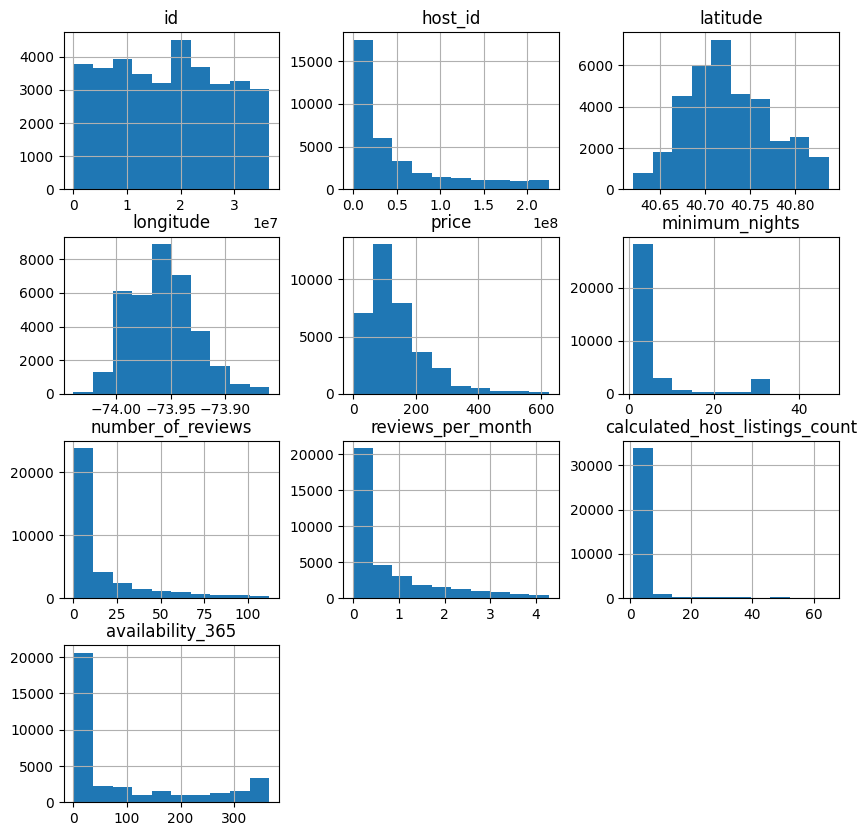

In [121]:
NY_dataset_wo.hist(figsize=(10,10))

In [122]:
NY_dataset_wo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,35754.000,17660800.029,10373197.522,2539.000,8782269.500,18035321.500,26311018.250,36487245.000
host_id,35754.000,48581620.297,58412863.460,2438.000,6349372.000,23388169.000,67567916.000,224827088.000
latitude,35754.000,40.727,0.047,40.620,40.690,40.721,40.762,40.838
longitude,35754.000,-73.958,0.030,-74.039,-73.983,-73.957,-73.941,-73.860
price,35754.000,135.437,92.952,0.000,70.000,110.000,175.000,625.000
minimum_nights,35754.000,5.708,8.107,1.000,2.000,3.000,5.000,47.000
number_of_reviews,35754.000,15.099,22.952,0.000,1.000,5.000,19.000,112.000
reviews_per_month,35754.000,0.717,0.967,0.000,0.040,0.270,1.000,4.280
calculated_host_listings_count,35754.000,2.654,6.337,1.000,1.000,1.000,2.000,65.000
availability_365,35754.000,90.271,124.660,0.000,0.000,9.000,170.000,365.000
